Data preprocessing/cleaning & sentiment analysis using TextBlob

In [1]:
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import nltk
nltk.download('stopwords')

# Load the Zomato reviews dataset
citrus_df = pd.read_csv('Citrus_reviews.csv', encoding='unicode_escape')
nook_df = pd.read_csv('Nook_reviews.csv', encoding='unicode_escape')
byg_df = pd.read_csv('byg_reviews.csv', encoding='unicode_escape')

# Function to preprocess text (remove stop words and perform stemming)
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    words = text.split()
    filtered_words = [ps.stem(word) for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply text preprocessing
citrus_df['clean_review'] = citrus_df['Reviews'].apply(preprocess_text)
nook_df['clean_review'] = nook_df['Reviews'].apply(preprocess_text)
byg_df['clean_review'] = byg_df['Reviews'].apply(preprocess_text)

# Sentiment Analysis with TextBlob
def analyze_sentiment_textblob(text):
    """
    Analyzes the sentiment of the text using TextBlob.
    Returns the polarity score.
    """
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to each review
citrus_df['polarity_textblob'] = citrus_df['clean_review'].apply(analyze_sentiment_textblob)
nook_df['polarity_textblob'] = nook_df['clean_review'].apply(analyze_sentiment_textblob)
byg_df['polarity_textblob'] = byg_df['clean_review'].apply(analyze_sentiment_textblob)

# Display the results
print("Citrus Reviews:")
print(citrus_df[['Ratings', 'clean_review', 'polarity_textblob']])

print("\nNook Reviews:")
print(nook_df[['Ratings', 'clean_review', 'polarity_textblob']])

print("\nByg Reviews:")
print(byg_df[['Ratings', 'clean_review', 'polarity_textblob']])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Citrus Reviews:
     Ratings                                       clean_review  \
0          1  zomato show 4700 two. realiti it 8177 two. m...   
1          3                            buffet food felt fresh.   
2          2  limit great vegetarian choic servic better one...   
3          5                                      awesom experi   
4          1  went dinner buffet wednesday husband' birthday...   
..       ...                                                ...   
403        3                went citru dessert. heard lot see \   
404        1  twice row experi leela disaster.. occass serv ...   
405        5  came grand reopen sunday buffet beyond words. ...   
406        1  came parent anniversari citru , hope food gott...   
407        4  parent took surpris dinner occas 16th birthday...   

     polarity_textblob  
0             0.000000  
1             0.300000  
2             0.600000  
3             0.000000  
4            -0.055952  
..                 ...  
403 

Sentiment Analysis with TextBlob

In [2]:
from textblob import TextBlob

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    # Determine polarity of the text (-1 for negative, 0 for neutral, 1 for positive)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis using TextBlob to the preprocessed reviews
citrus_df['sentiment_textblob'] = citrus_df['clean_review'].apply(analyze_sentiment_textblob)
nook_df['sentiment_textblob'] = nook_df['clean_review'].apply(analyze_sentiment_textblob)
byg_df['sentiment_textblob'] = byg_df['clean_review'].apply(analyze_sentiment_textblob)

# Display the first few rows of each DataFrame with the sentiment analysis results
print("Citrus Reviews with Sentiment Analysis using TextBlob:")
print(citrus_df[['Ratings', 'clean_review', 'sentiment_textblob']])
print("\nNook Reviews with Sentiment Analysis using TextBlob:")
print(nook_df[['Ratings', 'clean_review', 'sentiment_textblob']])
print("\nByg Reviews with Sentiment Analysis using TextBlob:")
print(byg_df[['Ratings', 'clean_review', 'sentiment_textblob']])

Citrus Reviews with Sentiment Analysis using TextBlob:
     Ratings                                       clean_review  \
0          1  zomato show 4700 two. realiti it 8177 two. m...   
1          3                            buffet food felt fresh.   
2          2  limit great vegetarian choic servic better one...   
3          5                                      awesom experi   
4          1  went dinner buffet wednesday husband' birthday...   
..       ...                                                ...   
403        3                went citru dessert. heard lot see \   
404        1  twice row experi leela disaster.. occass serv ...   
405        5  came grand reopen sunday buffet beyond words. ...   
406        1  came parent anniversari citru , hope food gott...   
407        4  parent took surpris dinner occas 16th birthday...   

    sentiment_textblob  
0              Neutral  
1             Positive  
2             Positive  
3              Neutral  
4             N

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


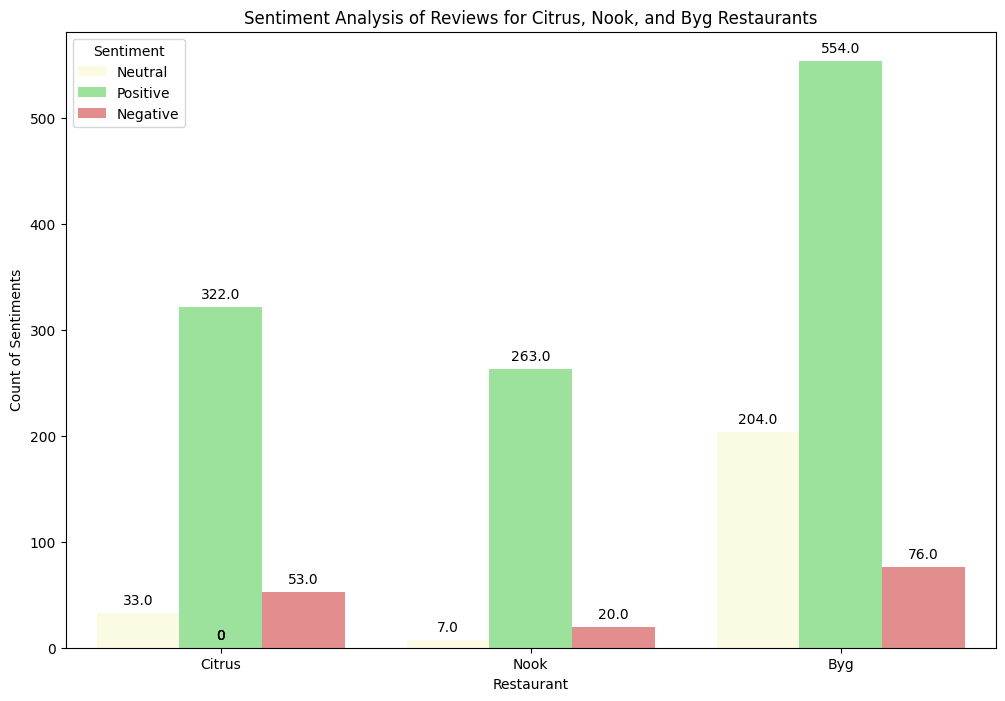

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

nltk.download('stopwords')

# Load the Zomato reviews datasets
citrus_df = pd.read_csv('Citrus_reviews.csv', encoding='unicode_escape')
nook_df = pd.read_csv('Nook_reviews.csv', encoding='unicode_escape')
byg_df = pd.read_csv('byg_reviews.csv', encoding='unicode_escape')

# Function to preprocess text (remove stop words and perform stemming)
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    words = text.split()
    filtered_words = [ps.stem(word) for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply text preprocessing
citrus_df['clean_review'] = citrus_df['Reviews'].apply(preprocess_text)
nook_df['clean_review'] = nook_df['Reviews'].apply(preprocess_text)
byg_df['clean_review'] = byg_df['Reviews'].apply(preprocess_text)

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    # Determine polarity of the text (-1 for negative, 0 for neutral, 1 for positive)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis using TextBlob to the preprocessed reviews
citrus_df['sentiment_textblob'] = citrus_df['clean_review'].apply(analyze_sentiment_textblob)
nook_df['sentiment_textblob'] = nook_df['clean_review'].apply(analyze_sentiment_textblob)
byg_df['sentiment_textblob'] = byg_df['clean_review'].apply(analyze_sentiment_textblob)

# Combine data from all three datasets for visualization
all_reviews = pd.concat([
    citrus_df[['sentiment_textblob']].assign(Restaurant='Citrus'),
    nook_df[['sentiment_textblob']].assign(Restaurant='Nook'),
    byg_df[['sentiment_textblob']].assign(Restaurant='Byg')
])

# Plotting sentiment analysis results
plt.figure(figsize=(12, 8))
barplot = sns.countplot(x='Restaurant', hue='sentiment_textblob', data=all_reviews, palette={'Positive': 'lightgreen', 'Neutral': 'lightyellow', 'Negative': 'lightcoral'})

# Add labels on top of the bars
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')

plt.title('Sentiment Analysis of Reviews for Citrus, Nook, and Byg Restaurants')
plt.xlabel('Restaurant')
plt.ylabel('Count of Sentiments')
plt.legend(title='Sentiment')
plt.show()


Sentiment Analysis with VADER

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis using VADER
def analyze_sentiment_vader(text):
    # Get sentiment scores for the text
    scores = sia.polarity_scores(text)
    # Determine sentiment label based on compound score
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis using VADER to the preprocessed reviews
citrus_df['sentiment_vader'] = citrus_df['clean_review'].apply(analyze_sentiment_vader)
nook_df['sentiment_vader'] = nook_df['clean_review'].apply(analyze_sentiment_vader)
byg_df['sentiment_vader'] = byg_df['clean_review'].apply(analyze_sentiment_vader)

# Display the first few rows of each DataFrame with the sentiment analysis results
print("Citrus Reviews with Sentiment Analysis using VADER:")
print(citrus_df[['Ratings', 'clean_review', 'sentiment_vader']])
print("\nNook Reviews with Sentiment Analysis using VADER:")
print(nook_df[['Ratings', 'clean_review', 'sentiment_vader']])
print("\nByg Reviews with Sentiment Analysis using VADER:")
print(byg_df[['Ratings', 'clean_review', 'sentiment_vader']])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Citrus Reviews with Sentiment Analysis using VADER:
     Ratings                                       clean_review  \
0          1  zomato show 4700 two. realiti it 8177 two. m...   
1          3                            buffet food felt fresh.   
2          2  limit great vegetarian choic servic better one...   
3          5                                      awesom experi   
4          1  went dinner buffet wednesday husband' birthday...   
..       ...                                                ...   
403        3                went citru dessert. heard lot see \   
404        1  twice row experi leela disaster.. occass serv ...   
405        5  came grand reopen sunday buffet beyond words. ...   
406        1  came parent anniversari citru , hope food gott...   
407        4  parent took surpris dinner occas 16th birthday...   

    sentiment_vader  
0          Negative  
1          Positive  
2          Positive  
3           Neutral  
4           Neutral  
..         

Sentiment Analysis with Logistic Regression

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform the text data to TF-IDF features for each restaurant
X_citrus = tfidf_vectorizer.fit_transform(citrus_df['clean_review'])
X_nook = tfidf_vectorizer.fit_transform(nook_df['clean_review'])
X_byg = tfidf_vectorizer.fit_transform(byg_df['clean_review'])

# Add the 'sentiment' column to each DataFrame
citrus_df['sentiment'] = citrus_df['Ratings'].apply(lambda x: 0 if int(x) == 1 else 2 if int(x) == 2 else 3 if int(x) == 3 else 4 if int(x) == 4 else 5)
nook_df['sentiment'] = nook_df['Ratings'].apply(lambda x: 1 if int(x) == 1 else 2 if int(x) == 2 else 3 if int(x) == 3 else 4 if int(x) == 4 else 5)
byg_df['sentiment'] = byg_df['Ratings'].apply(lambda x: 1 if int(x) == 1 else 2 if int(x) == 2 else 3 if int(x) == 3 else 4 if int(x) == 4 else 5)

# Define target variable (sentiment label) for each restaurant
y_citrus = citrus_df['sentiment'].values
y_nook = nook_df['sentiment'].values
y_byg = byg_df['sentiment'].values


# Split the dataset into training and testing sets for each restaurant
X_train_citrus, X_test_citrus, y_train_citrus, y_test_citrus = train_test_split(X_citrus, y_citrus, test_size=0.2, random_state=42)
X_train_nook, X_test_nook, y_train_nook, y_test_nook = train_test_split(X_nook, y_nook, test_size=0.2, random_state=42)
X_train_byg, X_test_byg, y_train_byg, y_test_byg = train_test_split(X_byg, y_byg, test_size=0.2, random_state=42)

# Initialize logistic regression model for each restaurant
log_reg_model_citrus = LogisticRegression()
log_reg_model_nook = LogisticRegression()
log_reg_model_byg = LogisticRegression()

# Train the logistic regression model for each restaurant
log_reg_model_citrus.fit(X_train_citrus, y_train_citrus)
log_reg_model_nook.fit(X_train_nook, y_train_nook)
log_reg_model_byg.fit(X_train_byg, y_train_byg)

# Predict sentiment labels for test data for each restaurant
y_pred_citrus = log_reg_model_citrus.predict(X_test_citrus)
y_pred_nook = log_reg_model_nook.predict(X_test_nook)
y_pred_byg = log_reg_model_byg.predict(X_test_byg)

# Calculate accuracy for each restaurant
accuracy_citrus = accuracy_score(y_test_citrus, y_pred_citrus)
accuracy_nook = accuracy_score(y_test_nook, y_pred_nook)
accuracy_byg = accuracy_score(y_test_byg, y_pred_byg)

# Display accuracy for each restaurant
print("Citrus Restaurant Accuracy:", accuracy_citrus)
print("Nook Restaurant Accuracy:", accuracy_nook)
print("BYG Restaurant Accuracy:", accuracy_byg)

# Display classification report for each restaurant
print("\nCitrus Restaurant Classification Report:")
print(classification_report(y_test_citrus, y_pred_citrus))

print("\nNook Restaurant Classification Report:")
print(classification_report(y_test_nook, y_pred_nook))

print("\nBYG Restaurant Classification Report:")
print(classification_report(y_test_byg, y_pred_byg))

Citrus Restaurant Accuracy: 0.4268292682926829
Nook Restaurant Accuracy: 0.5517241379310345
BYG Restaurant Accuracy: 0.8083832335329342

Citrus Restaurant Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.08      0.14        12
           2       0.00      0.00      0.00         3
           3       0.46      0.35      0.40        17
           4       0.39      0.75      0.51        28
           5       0.54      0.32      0.40        22

    accuracy                           0.43        82
   macro avg       0.38      0.30      0.29        82
weighted avg       0.45      0.43      0.39        82


Nook Restaurant Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        10
           4       0.43      0.83      0.57        18
           5       0.7

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Data visualization
Frequency of words

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


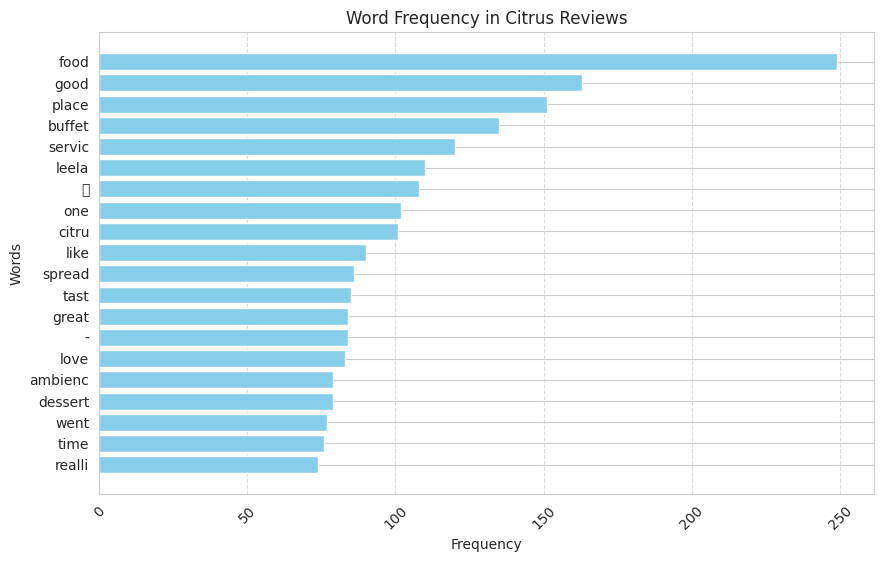

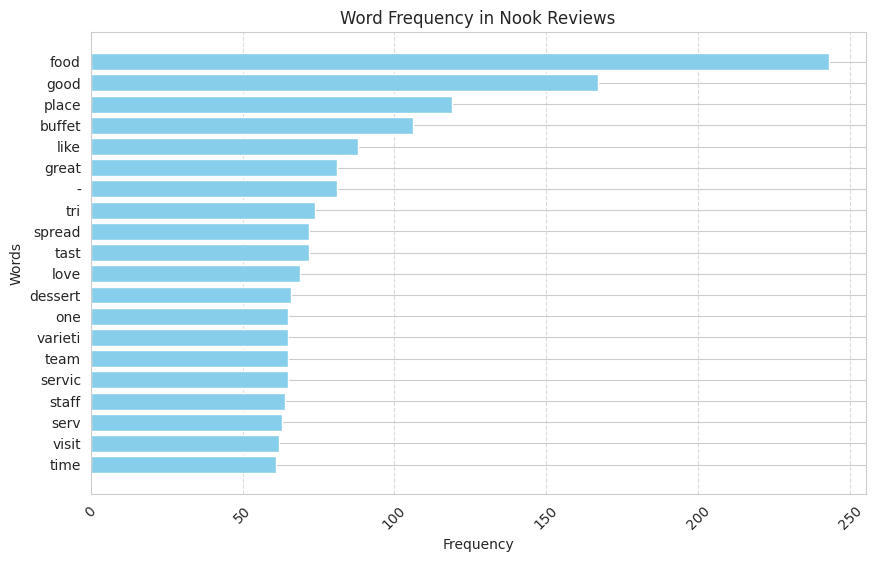

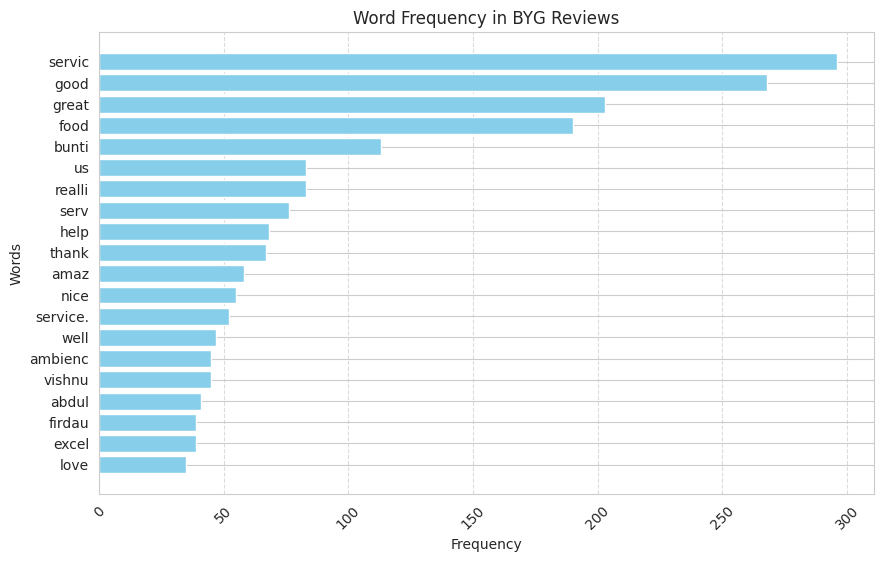

In [50]:
import matplotlib.pyplot as plt
from collections import Counter

# Function to plot word frequency lateral bar graph
def plot_word_frequency_bar_graph(text_data, title, num_words=20):
    # Tokenize the text data
    words = ' '.join(text_data).split()

    # Calculate word frequency
    word_freq = Counter(words)
    common_words = word_freq.most_common(num_words)

    # Extract words and frequencies
    words = [word[0] for word in common_words]
    frequencies = [word[1] for word in common_words]

    # Plot bar graph
    plt.figure(figsize=(10, 6))
    plt.barh(words, frequencies, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis to display highest frequency words on top
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.gca().set_axisbelow(True)  # Ensure that bars are behind grid lines
    plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add horizontal grid lines
    plt.show()

# Plot word frequency lateral bar graph for Citrus Reviews
plot_word_frequency_bar_graph(citrus_df['clean_review'], 'Word Frequency in Citrus Reviews')

# Plot word frequency lateral bar graph for Nook Reviews
plot_word_frequency_bar_graph(nook_df['clean_review'], 'Word Frequency in Nook Reviews')

# Plot word frequency lateral bar graph for BYG Reviews
plot_word_frequency_bar_graph(byg_df['clean_review'], 'Word Frequency in BYG Reviews')


Word Cloud

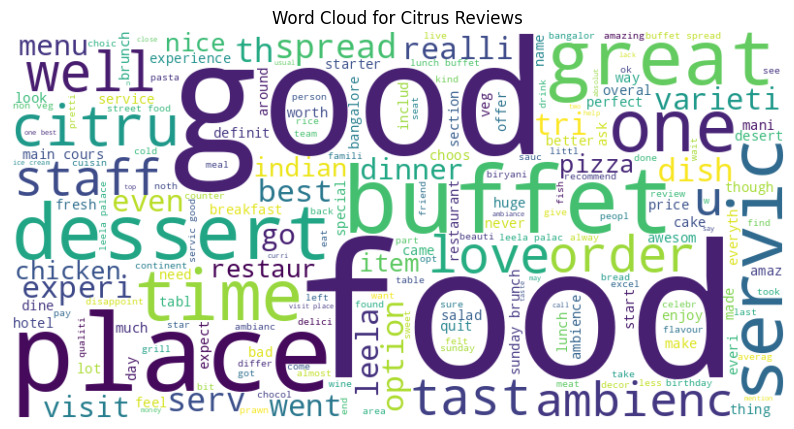

------


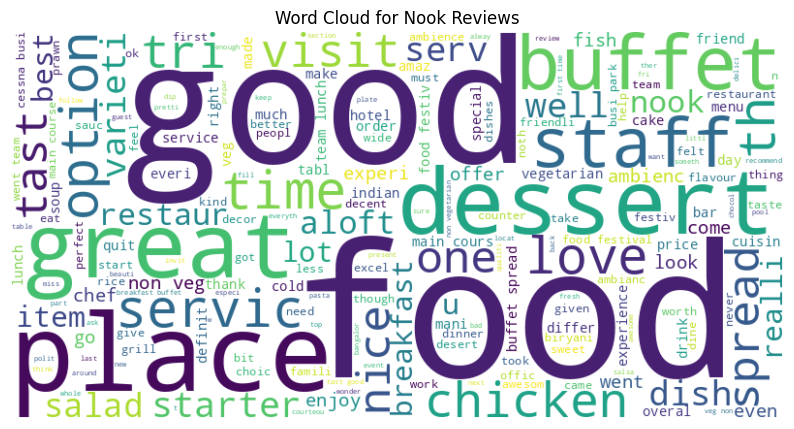

------


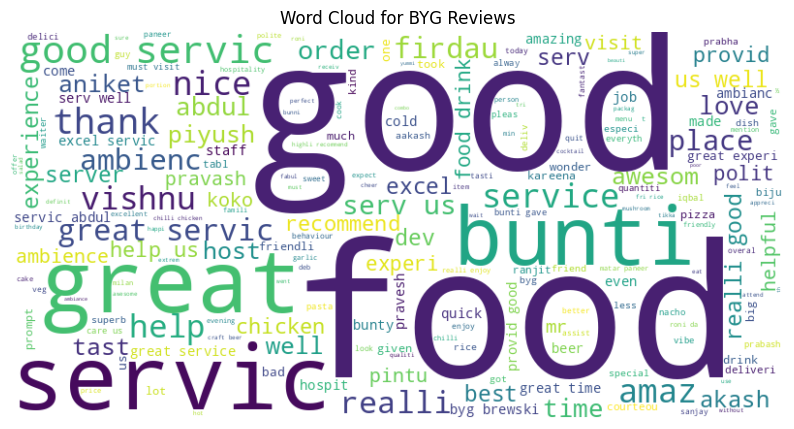

------


In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud
def generate_word_cloud(text_data, title):
    # Join all the reviews into a single string
    text = ' '.join(text_data)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', random_state=42).generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word cloud for Citrus Reviews
generate_word_cloud(citrus_df['clean_review'], 'Word Cloud for Citrus Reviews')
print("------")
# Generate word cloud for Nook Reviews
generate_word_cloud(nook_df['clean_review'], 'Word Cloud for Nook Reviews')
print("------")
# Generate word cloud for BYG Reviews
generate_word_cloud(byg_df['clean_review'], 'Word Cloud for BYG Reviews')
print("------")

Bigram and tigram

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to extract n-grams from text data
def extract_ngrams(text_data, ngram_range=(2, 3), top_n=20):
    # Initialize CountVectorizer to extract n-grams
    vectorizer = CountVectorizer(ngram_range=ngram_range)

    # Fit and transform the text data to extract n-grams
    X = vectorizer.fit_transform(text_data)

    # Get feature names (n-grams)
    feature_names = vectorizer.get_feature_names_out()

    # Get total counts of each n-gram
    counts = X.sum(axis=0).A1

    # Create a dictionary of n-grams and their counts
    ngrams_count = dict(zip(feature_names, counts))

    # Sort the n-grams by their counts in descending order
    sorted_ngrams = sorted(ngrams_count.items(), key=lambda x: x[1], reverse=True)

    # Select the top n n-grams
    top_ngrams = sorted_ngrams[:top_n]

    return top_ngrams

# Function to display n-grams in a table
def display_ngrams_table(ngrams, title):
    print(f"Top {len(ngrams)} {title}:")
    print("--------------------------------------------------")
    print("| {:<30} | {:<10} |".format("N-gram", "Count"))
    print("--------------------------------------------------")
    for ngram, count in ngrams:
        print("| {:<30} | {:<10} |".format(ngram, count))
    print("--------------------------------------------------")

# Extract and display bigrams and trigrams for Citrus Reviews
citrus_bigrams = extract_ngrams(citrus_df['clean_review'], ngram_range=(2, 2))
citrus_trigrams = extract_ngrams(citrus_df['clean_review'], ngram_range=(3, 3))

display_ngrams_table(citrus_bigrams, "Bigrams in Citrus Reviews")
display_ngrams_table(citrus_trigrams, "Trigrams in Citrus Reviews")

# Extract and display bigrams and trigrams for Nook Reviews
nook_bigrams = extract_ngrams(nook_df['clean_review'], ngram_range=(2, 2))
nook_trigrams = extract_ngrams(nook_df['clean_review'], ngram_range=(3, 3))

display_ngrams_table(nook_bigrams, "Bigrams in Nook Reviews")
display_ngrams_table(nook_trigrams, "Trigrams in Nook Reviews")

# Extract and display bigrams and trigrams for BYG Reviews
byg_bigrams = extract_ngrams(byg_df['clean_review'], ngram_range=(2, 2))
byg_trigrams = extract_ngrams(byg_df['clean_review'], ngram_range=(3, 3))

display_ngrams_table(byg_bigrams, "Bigrams in BYG Reviews")
display_ngrams_table(byg_trigrams, "Trigrams in BYG Reviews")

Top 20 Bigrams in Citrus Reviews:
--------------------------------------------------
| N-gram                         | Count      |
--------------------------------------------------
| main cours                     | 34         |
| sunday brunch                  | 30         |
| leela palac                    | 26         |
| buffet spread                  | 23         |
| street food                    | 23         |
| lunch buffet                   | 20         |
| leela palace                   | 18         |
| good food                      | 17         |
| non veg                        | 17         |
| servic good                    | 17         |
| visit place                    | 16         |
| one best                       | 15         |
| ice cream                      | 14         |
| valu money                     | 14         |
| live counter                   | 13         |
| north indian                   | 13         |
| realli good                    | 13         |


Histogram polarity score

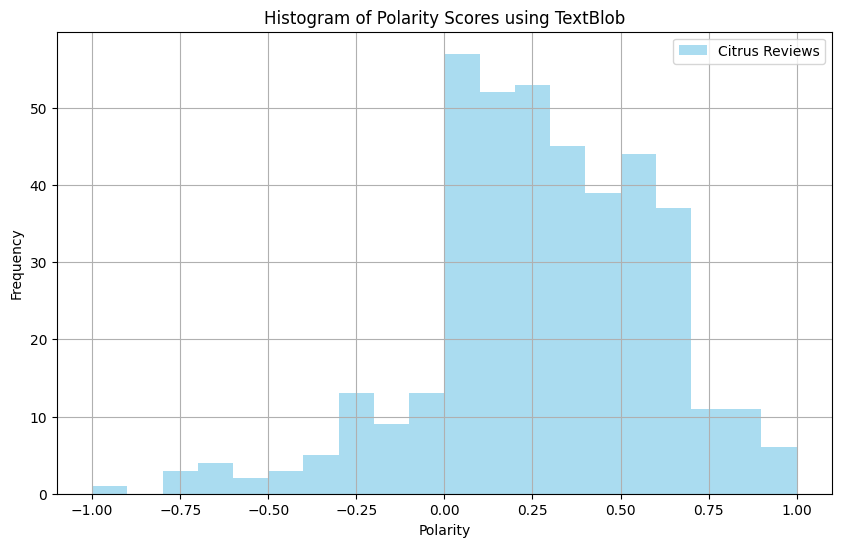

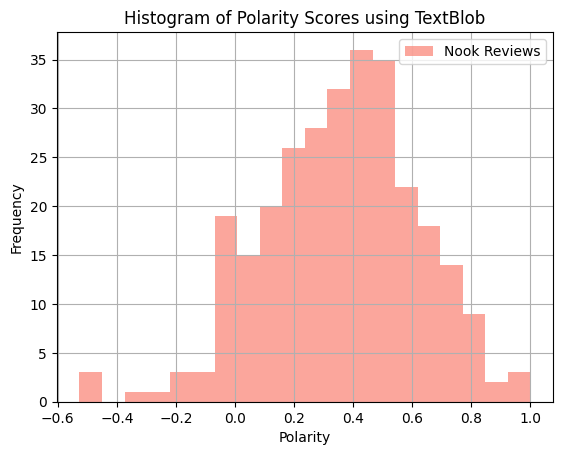

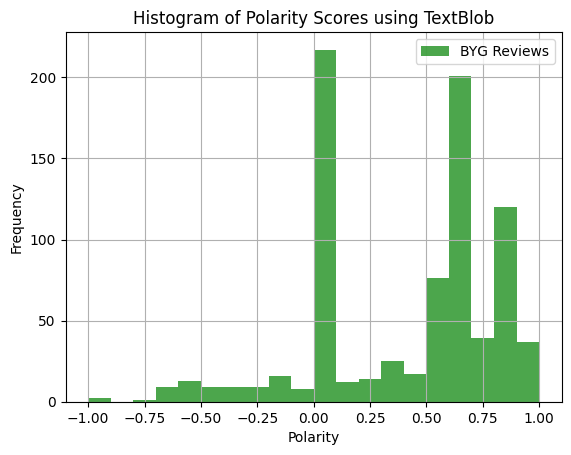

In [10]:
import matplotlib.pyplot as plt
from textblob import TextBlob

# Function to calculate polarity score using TextBlob
def calculate_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Calculate polarity scores for all reviews
citrus_df['polarity'] = citrus_df['clean_review'].apply(calculate_polarity)
nook_df['polarity'] = nook_df['clean_review'].apply(calculate_polarity)
byg_df['polarity'] = byg_df['clean_review'].apply(calculate_polarity)

# Plot histogram of polarity scores
plt.figure(figsize=(10, 6))
plt.hist(citrus_df['polarity'], bins=20, color='skyblue', alpha=0.7, label='Citrus Reviews')
plt.title('Histogram of Polarity Scores using TextBlob')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

plt.hist(nook_df['polarity'], bins=20, color='salmon', alpha=0.7, label='Nook Reviews')
plt.title('Histogram of Polarity Scores using TextBlob')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

plt.hist(byg_df['polarity'], bins=20, color='green', alpha=0.7, label='BYG Reviews')
plt.title('Histogram of Polarity Scores using TextBlob')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-26-f8899999e7f6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ratings', y='polarity', data=citrus_df, palette=custom_palette, showfliers=False)


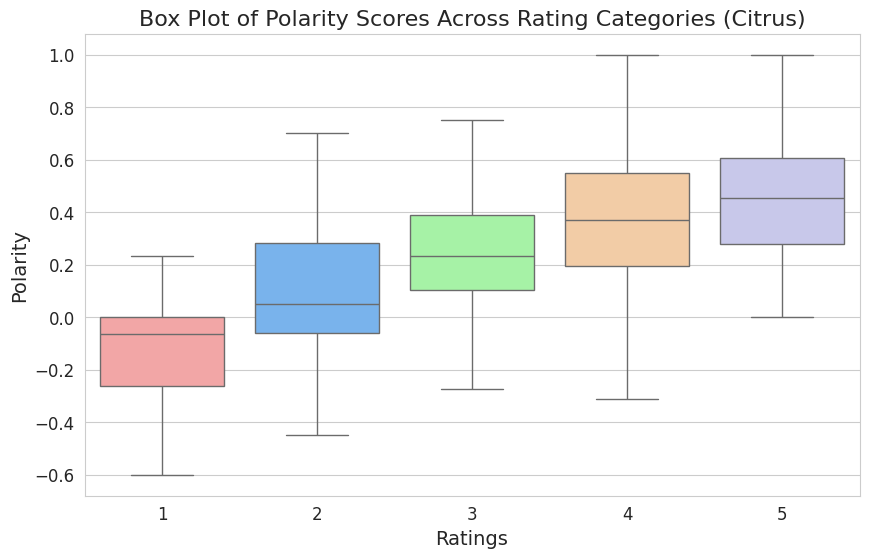

<ipython-input-26-f8899999e7f6>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ratings', y='polarity', data=nook_df, palette=custom_palette, showfliers=False)


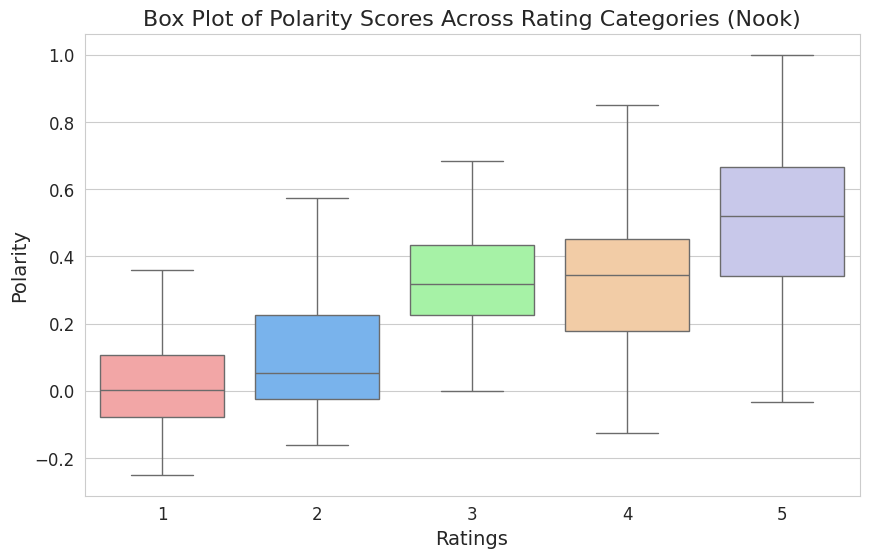

<ipython-input-26-f8899999e7f6>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ratings', y='polarity', data=byg_df, palette=custom_palette, showfliers=False)


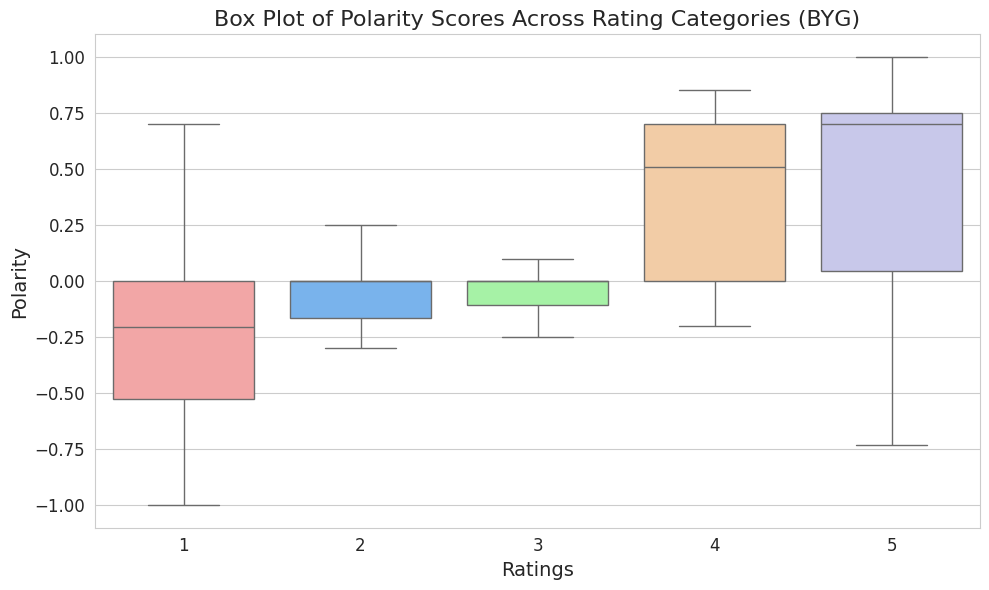

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom color palette
custom_palette = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Set style
sns.set_style("whitegrid")

# Box plot of polarity scores across rating categories for Citrus Reviews
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ratings', y='polarity', data=citrus_df, palette=custom_palette, showfliers=False)
plt.title('Box Plot of Polarity Scores Across Rating Categories (Citrus)', fontsize=16)
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Polarity', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Box plot of polarity scores across rating categories for Nook Reviews
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ratings', y='polarity', data=nook_df, palette=custom_palette, showfliers=False)
plt.title('Box Plot of Polarity Scores Across Rating Categories (Nook)', fontsize=16)
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Polarity', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Box plot of polarity scores across rating categories for BYG Reviews
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ratings', y='polarity', data=byg_df, palette=custom_palette, showfliers=False)
plt.title('Box Plot of Polarity Scores Across Rating Categories (BYG)', fontsize=16)
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Polarity', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


VADER

<ipython-input-12-364d64709da7>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_vader', data=citrus_df, order=['Positive', 'Neutral', 'Negative'], palette='coolwarm')
<ipython-input-12-364d64709da7>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_vader', data=nook_df, order=['Positive', 'Neutral', 'Negative'], palette='coolwarm')
<ipython-input-12-364d64709da7>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_vader', data=byg_df, order=['Positive', 'Neutral', 'Negative'], palette='coolwarm')


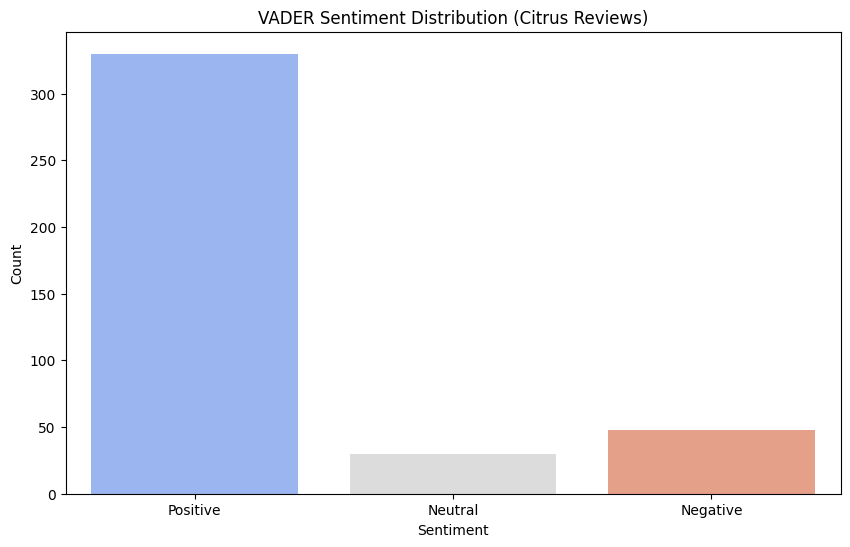

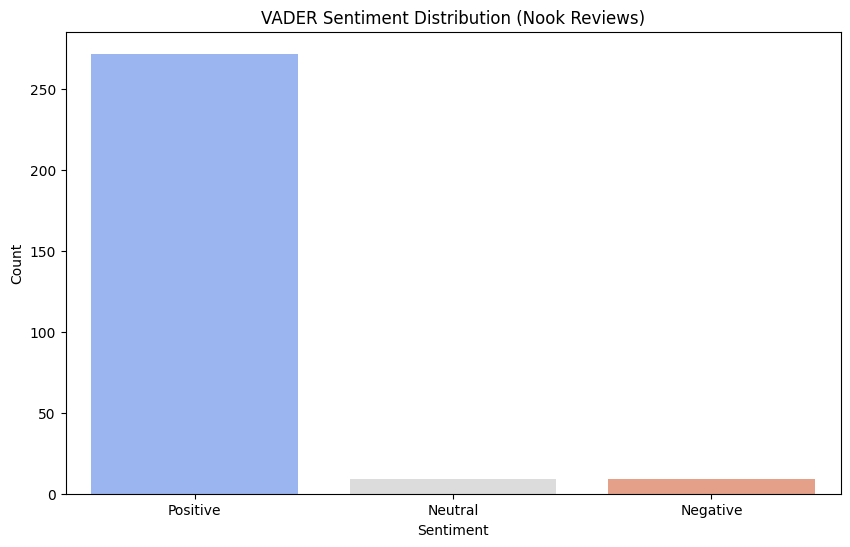

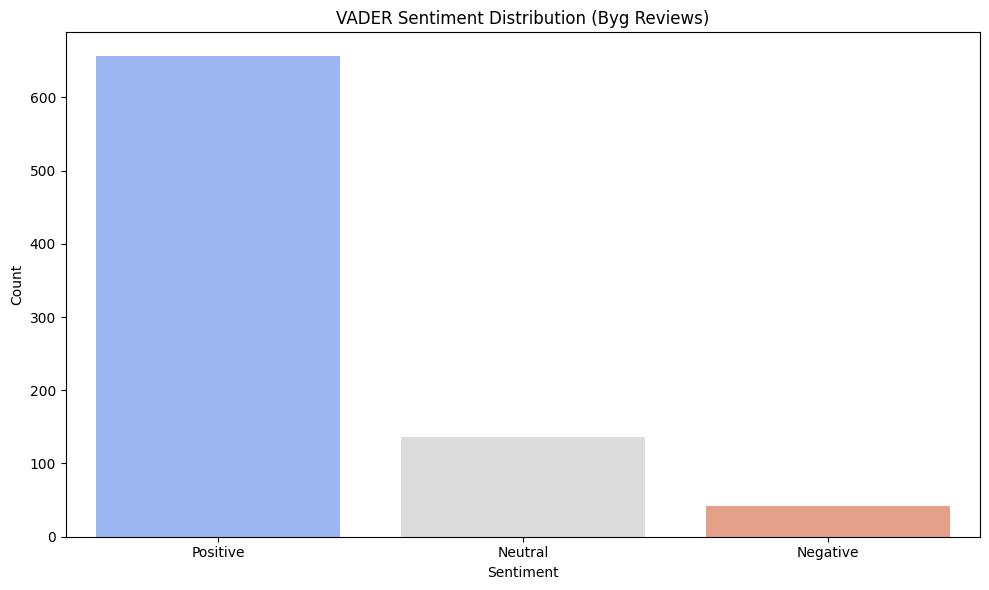

In [12]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment using VADER
def calculate_vader_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Calculate VADER sentiment for all reviews
citrus_df['sentiment_vader'] = citrus_df['clean_review'].apply(calculate_vader_sentiment)
nook_df['sentiment_vader'] = nook_df['clean_review'].apply(calculate_vader_sentiment)
byg_df['sentiment_vader'] = byg_df['clean_review'].apply(calculate_vader_sentiment)

# Plotting VADER sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_vader', data=citrus_df, order=['Positive', 'Neutral', 'Negative'], palette='coolwarm')
plt.title('VADER Sentiment Distribution (Citrus Reviews)')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_vader', data=nook_df, order=['Positive', 'Neutral', 'Negative'], palette='coolwarm')
plt.title('VADER Sentiment Distribution (Nook Reviews)')
plt.xlabel('Sentiment')
plt.ylabel('Count')

plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_vader', data=byg_df, order=['Positive', 'Neutral', 'Negative'], palette='coolwarm')
plt.title('VADER Sentiment Distribution (Byg Reviews)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<ipython-input-24-8c2f150a4ff7>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_vader', data=citrus_df, palette='Set2', order=['Positive', 'Neutral', 'Negative'])
<ipython-input-24-8c2f150a4ff7>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_vader', data=nook_df, palette='Set2', order=['Positive', 'Neutral', 'Negative'])
<ipython-input-24-8c2f150a4ff7>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_vader', data=byg_df, palette='Set2', order=['Positive', 'Neutral', 'Negative'])


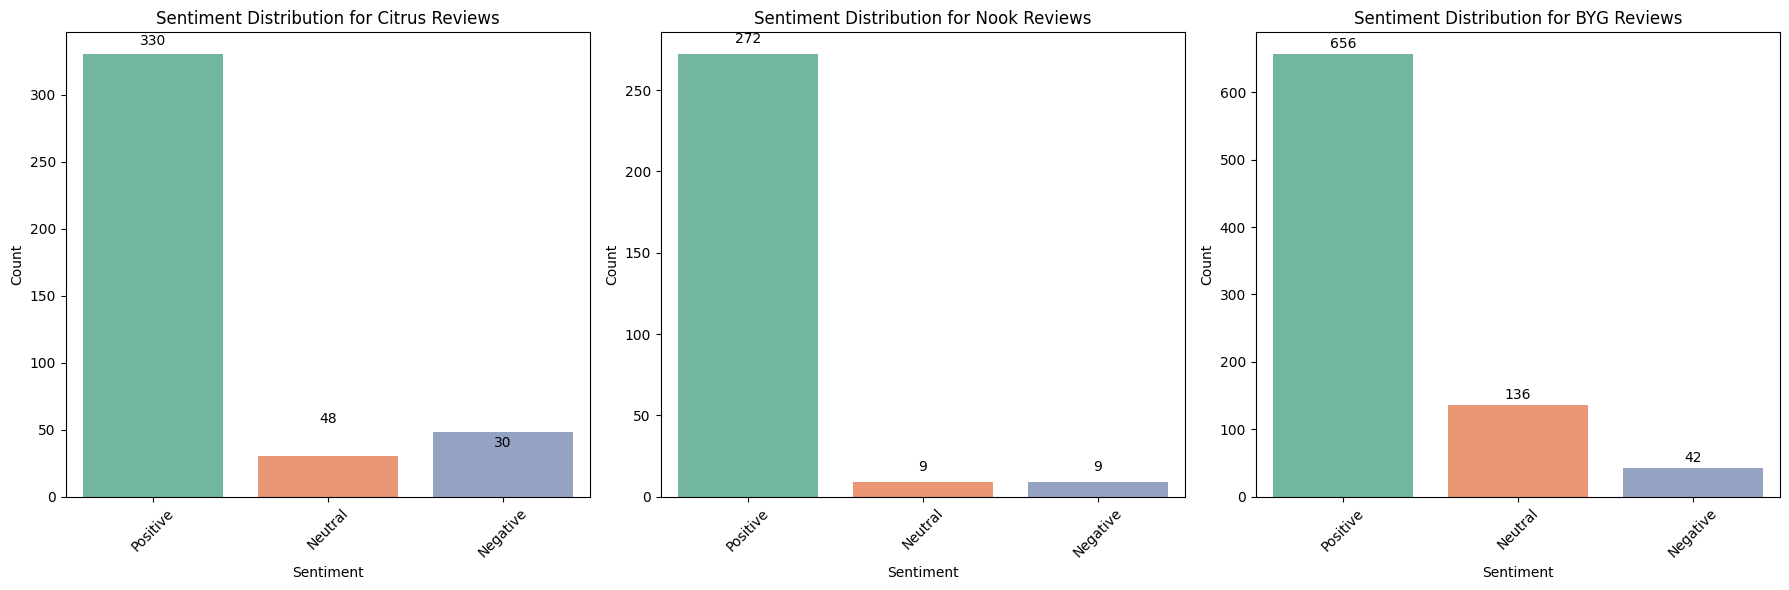

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment using VADER
def calculate_vader_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Calculate VADER sentiment for all reviews
citrus_df['sentiment_vader'] = citrus_df['clean_review'].apply(calculate_vader_sentiment)
nook_df['sentiment_vader'] = nook_df['clean_review'].apply(calculate_vader_sentiment)
byg_df['sentiment_vader'] = byg_df['clean_review'].apply(calculate_vader_sentiment)

# Plotting sentiment distribution for Citrus Reviews
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='sentiment_vader', data=citrus_df, palette='Set2', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution for Citrus Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
for index, value in enumerate(citrus_df['sentiment_vader'].value_counts().values):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

# Plotting sentiment distribution for Nook Reviews
plt.subplot(1, 3, 2)
sns.countplot(x='sentiment_vader', data=nook_df, palette='Set2', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution for Nook Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
for index, value in enumerate(nook_df['sentiment_vader'].value_counts().values):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

# Plotting sentiment distribution for BYG Reviews
plt.subplot(1, 3, 3)
sns.countplot(x='sentiment_vader', data=byg_df, palette='Set2', order=['Positive', 'Neutral', 'Negative'])
plt.title('Sentiment Distribution for BYG Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
for index, value in enumerate(byg_df['sentiment_vader'].value_counts().values):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [27]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment using VADER and return counts
def calculate_vader_sentiment_counts(text):
    sentiment_score = analyzer.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Calculate VADER sentiment for all reviews and get counts
citrus_sentiments = citrus_df['clean_review'].apply(calculate_vader_sentiment_counts)
nook_sentiments = nook_df['clean_review'].apply(calculate_vader_sentiment_counts)
byg_sentiments = byg_df['clean_review'].apply(calculate_vader_sentiment_counts)

# Get counts of each sentiment category
citrus_sentiment_counts = citrus_sentiments.value_counts()
nook_sentiment_counts = nook_sentiments.value_counts()
byg_sentiment_counts = byg_sentiments.value_counts()

# Print counts for interpretation
print("Citrus Reviews Sentiment Counts:")
print(citrus_sentiment_counts)
print("\nNook Reviews Sentiment Counts:")
print(nook_sentiment_counts)
print("\nBYG Reviews Sentiment Counts:")
print(byg_sentiment_counts)


Citrus Reviews Sentiment Counts:
clean_review
Positive    330
Negative     48
Neutral      30
Name: count, dtype: int64

Nook Reviews Sentiment Counts:
clean_review
Positive    272
Neutral       9
Negative      9
Name: count, dtype: int64

BYG Reviews Sentiment Counts:
clean_review
Positive    656
Neutral     136
Negative     42
Name: count, dtype: int64


Pie for both vader and textblog

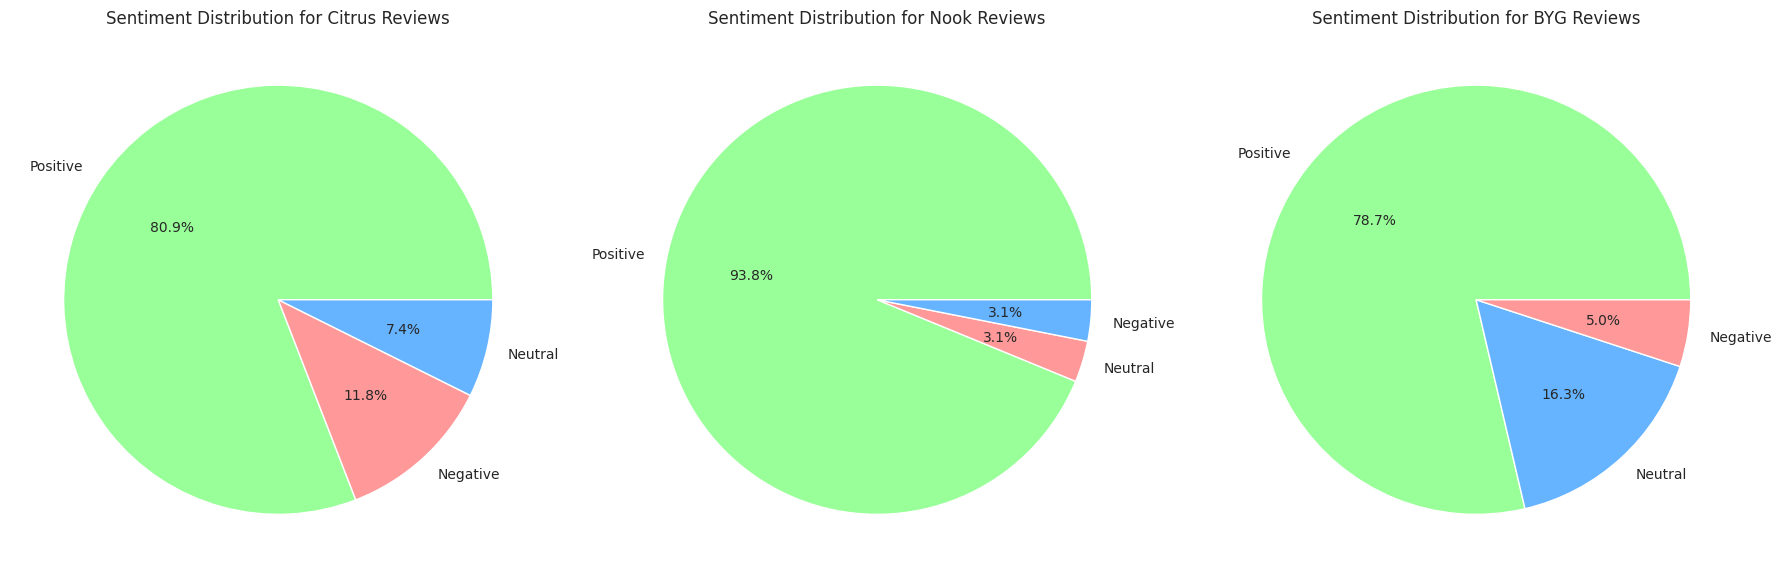

In [28]:
# Calculate sentiment counts for Citrus Reviews
citrus_sentiment_counts = citrus_df['sentiment_vader'].value_counts()

# Calculate sentiment counts for Nook Reviews
nook_sentiment_counts = nook_df['sentiment_vader'].value_counts()

# Calculate sentiment counts for BYG Reviews
byg_sentiment_counts = byg_df['sentiment_vader'].value_counts()

# Plotting sentiment distribution for Citrus Reviews
plt.figure(figsize=(18, 6))

# Pie chart for Citrus Reviews
plt.subplot(1, 3, 1)
plt.pie(citrus_sentiment_counts, labels=citrus_sentiment_counts.index, autopct='%1.1f%%', colors=['#99ff99','#ff9999','#66b3ff'])
plt.title('Sentiment Distribution for Citrus Reviews')

# Pie chart for Nook Reviews
plt.subplot(1, 3, 2)
plt.pie(nook_sentiment_counts, labels=nook_sentiment_counts.index, autopct='%1.1f%%', colors=['#99ff99','#ff9999','#66b3ff'])
plt.title('Sentiment Distribution for Nook Reviews')

# Pie chart for BYG Reviews
plt.subplot(1, 3, 3)
plt.pie(byg_sentiment_counts, labels=byg_sentiment_counts.index, autopct='%1.1f%%', colors=['#99ff99','#66b3ff','#ff9999'])
plt.title('Sentiment Distribution for BYG Reviews')

plt.tight_layout()
plt.show()

Total count

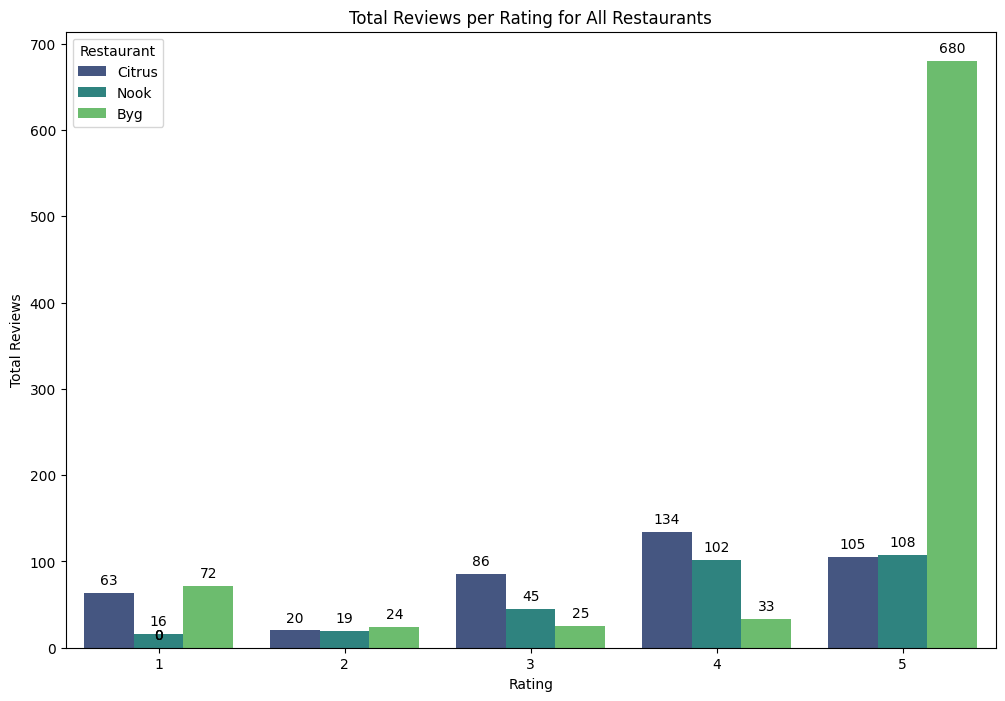

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Zomato reviews datasets
citrus_df = pd.read_csv('Citrus_reviews.csv', encoding='unicode_escape')
nook_df = pd.read_csv('Nook_reviews.csv', encoding='unicode_escape')
byg_df = pd.read_csv('byg_reviews.csv', encoding='unicode_escape')

# Function to count the total reviews per rating
def count_reviews_per_rating(df, restaurant_name):
    rating_counts = df['Ratings'].value_counts().sort_index()
    rating_counts_df = pd.DataFrame({'Rating': rating_counts.index, 'Count': rating_counts.values})
    rating_counts_df['Restaurant'] = restaurant_name
    return rating_counts_df

# Count the total reviews per rating for each restaurant
citrus_counts = count_reviews_per_rating(citrus_df, 'Citrus')
nook_counts = count_reviews_per_rating(nook_df, 'Nook')
byg_counts = count_reviews_per_rating(byg_df, 'Byg')

# Combine the counts into a single DataFrame
all_counts = pd.concat([citrus_counts, nook_counts, byg_counts])

# Plot the total reviews per rating for all restaurants
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Rating', y='Count', hue='Restaurant', data=all_counts, palette='viridis')

# Add labels on top of the bars
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{int(height)}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center',
                     xytext=(0, 9),
                     textcoords='offset points')

plt.title('Total Reviews per Rating for All Restaurants')
plt.xlabel('Rating')
plt.ylabel('Total Reviews')
plt.legend(title='Restaurant')
plt.show()

Logistic Regression combined

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Combine the DataFrames into one
combined_df = pd.concat([citrus_df, nook_df, byg_df])

# Map ratings to sentiment labels
def map_to_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

# Create 'sentiment' column based on ratings
combined_df['sentiment'] = combined_df['Ratings'].apply(map_to_sentiment)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_df['clean_review'], combined_df['sentiment'], test_size=0.2, random_state=42)

# Initialize logistic regression model
logistic_regression = LogisticRegression()

# Fit the model on the training data
logistic_regression.fit(X_train_tfidf, y_train)

# Predict sentiment labels for the testing data
y_pred = logistic_regression.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8371335504885994
Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.51      0.64        37
     Neutral       1.00      0.06      0.12        31
    Positive       0.83      0.99      0.90       239

    accuracy                           0.84       307
   macro avg       0.90      0.52      0.56       307
weighted avg       0.85      0.84      0.79       307



Accuracy Comparison Bar Plot

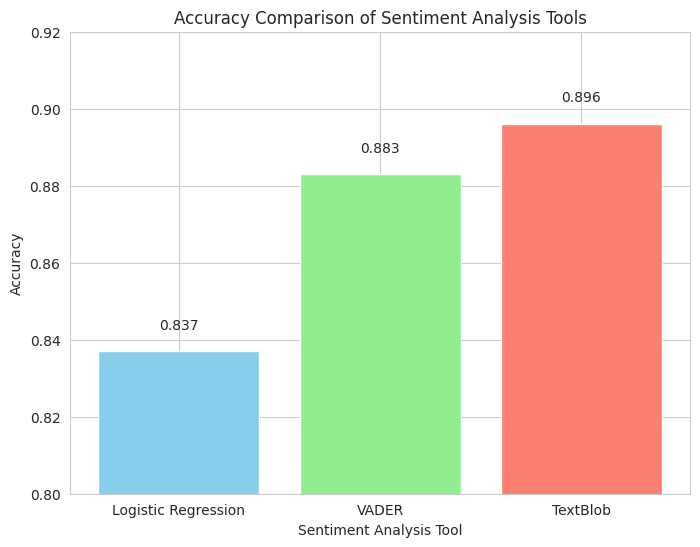

In [48]:
# Create bar plot with labels
plt.figure(figsize=(8, 6))
bars = plt.bar(tools, accuracy, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Accuracy Comparison of Sentiment Analysis Tools')
plt.xlabel('Sentiment Analysis Tool')
plt.ylabel('Accuracy')
plt.ylim(0.8, 0.92)
for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f'{acc:.3f}', ha='center', va='bottom')
plt.show()

Sentiment Distribution Pie Charts

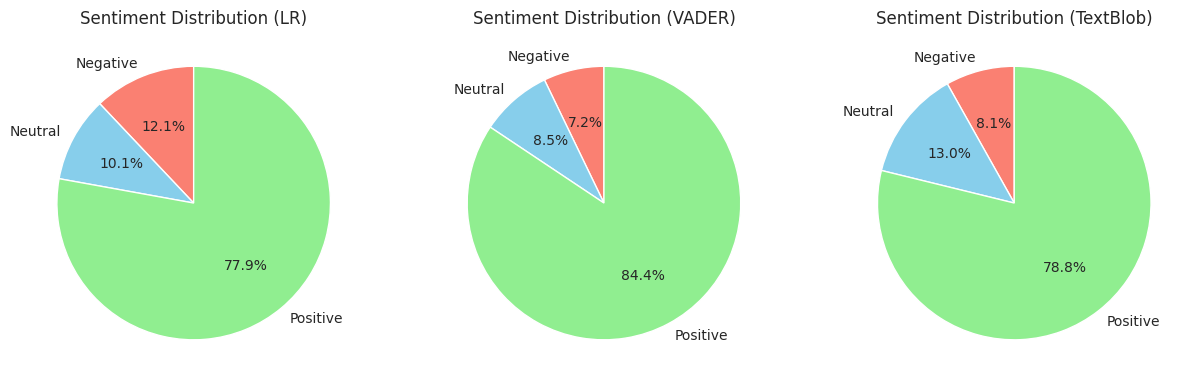

In [49]:
# Create pie charts with labels
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for ax, sizes, title in zip(axs, [sizes_lr, sizes_vader, sizes_blob], ['LR', 'VADER', 'TextBlob']):
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['salmon', 'skyblue', 'lightgreen'])
    ax.set_title(f'Sentiment Distribution ({title})')
plt.show()